In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

# Данные об уровне счастья в разных странах

In [3]:
df = pd.read_csv('2019.csv')

In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Проверим, как уровень доходов в стране коррелирует с показателем счастья. Для этого построим две точечные диаграммы, показывающие соотношение показателя счастья (ранга и значения показателя) и уровня ВВП на душу населения. Этот анализ позволит нам понять, действительно ли есть корреляция между тем, насколько страна "богатая", и уровнем счастья в ней. 
При этом довольно расхожим мнением является и то, что в бедных странах уровень счастья также бывает высоким. Таким образом, мы можем первично выдвинуть две гипотезы:<br>
1) Богатые страны более счастливые/счастливые страны более богатые <br>
Тогда мы увидим нечто напоминающее линейную зависимость между показателями.

2) Наиболее счастливы самые богатые страны и самые бедные страны <br>
Тогда мы увидим зависимость, напоминающую перевернутую "U".

Начнем с корреляции ранга и уровня ВВП на душу населения.

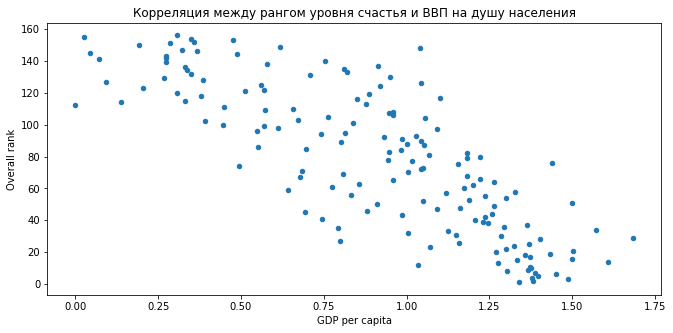

In [9]:
df.plot(kind='scatter', 
        x='GDP per capita', 
        y='Overall rank', 
        title='Корреляция между рангом уровня счастья и ВВП на душу населения')
plt.show()

По расположению точек на графике мы можем сказать, что зависимость скорее монотонная, то есть далее лучше проверять первую гипотезу. Совсем бедных стран с высокими оценками счастья мы в 2019 году не наблюдаем.
Более того, наблюдается некоторая асимметрия в расположении точек на графике, которая говорит нам, что даже среди стран со средними доходами довольно много стран с относительно низким уровнем счастья населения.

Рассмотрим теперь корреляцию ВВП на душу населения и абсолютного значения показателя счастья.

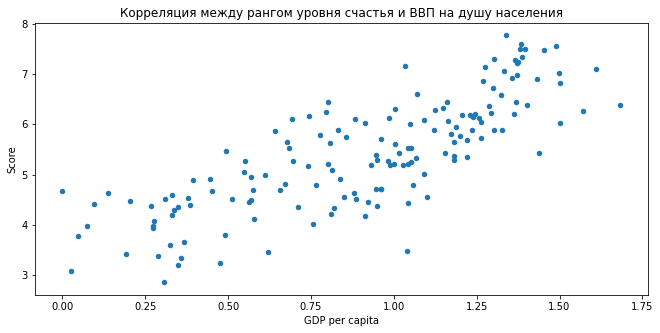

In [10]:
df.plot(kind='scatter', 
        x='GDP per capita', 
        y='Score', 
        title='Корреляция между рангом уровня счастья и ВВП на душу населения')
plt.show()

Результаты схожи: в более богатых странах выше уровень счастья (не оцениваем пока направление этой связи и причины). Отметим, что здесь нет такой явной асимметрии в расположении точек, как на графике с рангом, которая говорила нам, что даже среди стран со средними доходами довольно много стран с относительно низким уровнем счастья населения. Вероятно, это связано с тем, что ранжирование усиляет разницу в оценках уровня счастья, в то время как абсолютные значения показателей могут быть а) близки друг к другу; б) довольно высоки в абсолютном выражении даже для случаев, когда стране присваивается низкий ранг по счастью. Проверим, как устроен показатель счастья.

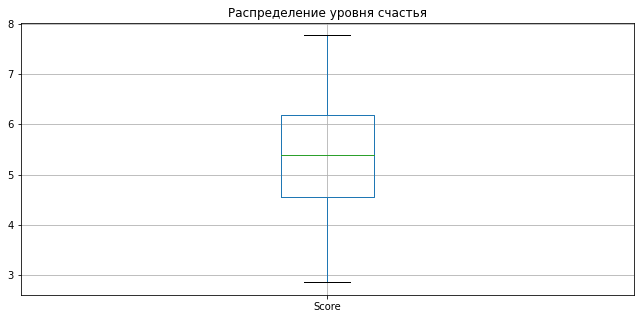

In [17]:
df['Score'].plot(kind='box',
                   title='Распределение уровня счастья', grid=True)
plt.show()

Видим, что, действительно, медианный уровень счастья несколько выше 5, хотя и не существенно. Можно сделать вывод, что люди в целом скорее склонны оценивать свой уровень счастья выше среднего, хотя этот эффект не слишком велик.

Проанализируем подробнее показатель уровня счастья, построим гистограмму.

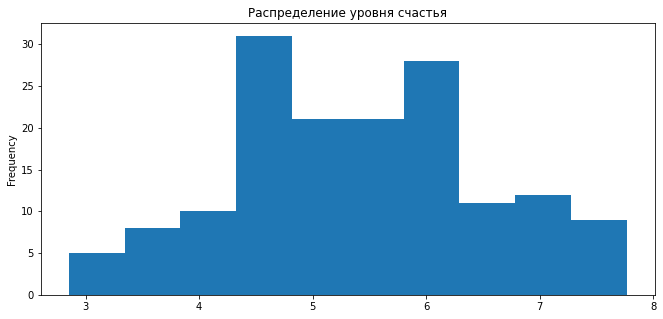

In [23]:
df['Score'].plot(kind='hist', 
                   title='Распределение уровня счастья')
plt.show()

На гистограмме также видно, что в целом люди более склонны оценивать свой уровень счастья выше среднего, хотя этот эффект не слишком велик. Довольно интересно, что в распределении показателя два пика - один чуть ниже 5 и второй в районе 6. Поскольку показатель опросный, это скорее всего говорит о том, что люди склонны оценивать свой уровень счастья не нейтрально (оценивая его на 5, хотя такие тоже есть), а давая какой-то окрас - либо положительный (все-таки выше 5, хотя и не намного), либо отрицательный (все-таки ниже 5, хотя и не намного). Можно исследовать данный вопрос в дальнейшем, проверяя, как устроен этот показатель в другие годы и является ли такая особенность устойчивой во времени.

Анализируя показатель ВВП на душу населения в связи с уровнем счастья, стоит также принять во внимание, что в наших данных он присутствует не в абсолютном выражении - размерность подкоррекирована, чтобы 6 показателей (столбцы 4-9) в сумме давали оценку уровня счастья. Это может затруднять интерпретацию.

Можем также попробовать исследовать корреляцию между счастьем, измеренным через ранг, богатством (хотя для оценки индивидуального благосостояния жителей ВВП на душу населения может быть не самым удачным показателем) и щедростью. Можно предположить, что щедрость способствует счастью, или что счастье способствует щедрости, или что и счастье, и щедрость как-то обусловлены иными факторами, например, уровнем богатства. Используем диаграмму матрицы рассеивания.

In [26]:
import seaborn as sns

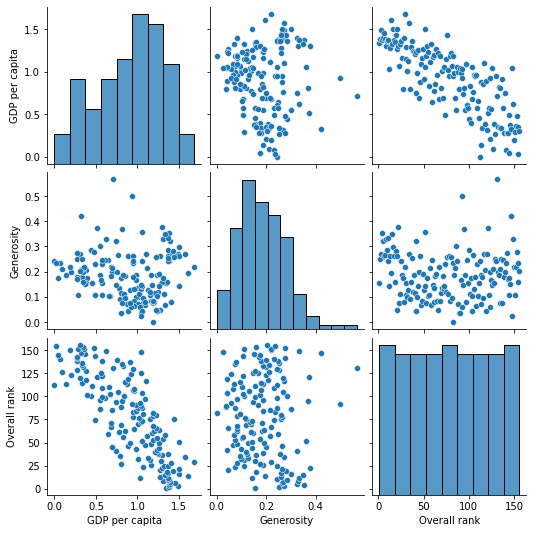

In [29]:
sns.pairplot(df[['GDP per capita', 'Generosity', 'Overall rank']])

Связь ВВП на душу населения и ранга по показателю счастья мы обсуждали выше. Беглый анализ диаграмм щедрости и счастья, а также ВВП на душу населения и счастья не дает нам таких же очевидных подсказок о возможных зависимостях.<br>
Распределение показателя щедрости является скорее положительно скошенным, и мы видим, что по его значениям люди скорее нещедрые (если середину интервала для этого показателя считать нейтральным уровнем), и такое положение дел не слишком коррелирует с уровнем счастья. Однако интересно, что выбросы, для которых характерна исключительная щедрость, это страны с относительно низким уровнем счастья. 
Щедрость может быть связана с ВВП на душу населения U-образной зависимостью, что может быть предметом дальнейшего изучения, в том числе за рамками данного датасета. 